In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
#importing libraries

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# loading data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#data cleanup

 ## What are Pivot Tables?

 Pivot Tables are a data processing tool used in programs to summarize, analyze, and present large sets of data. It allows users to reorganize and aggregate data dynamically, making it easier to extract insights.

In this section, we will be using pivot tables to visualise how the medain salaries of data analysts, data engineers and data scientists trend in the 6 most popular countries in our dataset. We have a pivot table method written in the following syntax:

- df.pivot_table()

where we have the parameters values, index, columns and aggfunc. 
- for the values, you provide columns/list of columns to aggregate
- for the index, you provide a column/list of columns to group by on the pivot table index (what we group by on rows)
- for the columns, you provide a column/list of columnds to group by on the pivot table column (what we group by on columns)
- for the aggfunc, you list the aggregation function like min(), mean() etc. 

In [2]:
df.pivot_table(index= 'job_title_short', aggfunc='size')

# Here, we input 'size' as it counts all the rows in a group. Count counts non-NA 
# values in each group

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

Lets say we now want to aggregate this so we can get the median yearly salary:

In [4]:
df.pivot_table(values = 'salary_year_avg', index= 'job_title_short', aggfunc='median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


Now you may be asking that we can also use the df.groupby() method in order to perform the same operation above, which is true.

However, let's say we now want to calculate the median salary for each of these job titles, but now broken down by country. With the df.pviot_tables method, we can do this in one line of code. This requires the last parameter to cover, which is 'columns'.

In [6]:
df.pivot_table(values = 'salary_year_avg', index= 'job_country', columns= 'job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


Now that we have the information of median salaries for each job organized by each country, now we want to create a bar chart of median salaries for data analysts, engineers and scientists in the top 6 most popular countries for these jobs.

In [15]:
top_countries = df['job_country'].value_counts().head(6).index
top_countries
#remember, value_counts() tells you the count of each unique value in a column. 
# Here, it counts the number of times there is a specific country in the df e.g.,
# US appear 206, 292 times 

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

Here, we see the top countries for jobs are United States, India, United Kingdom, France, Germany, Spain returned as an array. Now, we are going to filter the pivot table so that it only returns the median salaries in these 6 countries. 

We can do this by typing the following:

In [16]:
job_country_salary = df.pivot_table(
    values = 'salary_year_avg', 
    index= 'job_country', 
    columns= 'job_title_short', 
    aggfunc='median'
)
job_country_salary = job_country_salary.loc[top_countries]
# here we update the pivot table by filtering for the top_countries, which is an array
# of the list of 6 countries

job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


Now we can filter the columns by specifying the column names.

In [18]:
df_job_country_salary= job_country_salary[['Data Analyst', 'Data Engineer', 'Data Scientist']]
df_job_country_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


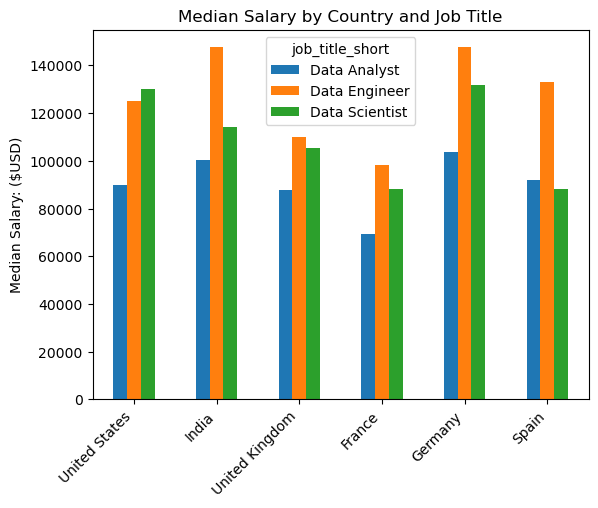

In [25]:
df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary: ($USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()
# here, Pandas understands it is a pivot table and is able to plot this very simply.
# Now, how can we do the same in matplotlib? 
# Remember: index = x_axis, columns = y_axis (in subgroups)

With this table, we can carry out some trend analysis with this table. Continue from 6:57 for index management.